In [22]:
#minisom- Minimalistic implementation of the Self Organizing Maps
from minisom import MiniSom
from sklearn.datasets import load_breast_cancer
import time
import numpy as np

In [23]:
# set hypermarameters
som_grid_rows = 30
som_grid_columns = 20
iterations = 500
sigma = 1
learning_rate = 0.5

In [24]:
#load data
data, target = load_breast_cancer(True)

In [25]:
data.shape

(569, 30)

In [26]:
target.shape

(569,)

In [27]:
data.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [4]:
#initialization
som = MiniSom(x=som_grid_rows,
             y=som_grid_columns,
             input_len=data.shape[1],
             sigma=sigma,
             learning_rate=learning_rate)
som.random_weights_init(data)

In [5]:
#training
start_time = time.time()
som.train_random(data, iterations) # training with 100 ieterations
elapsed_time = time.time()- start_time
print(elapsed_time, "seconds")

0.2170560359954834 seconds


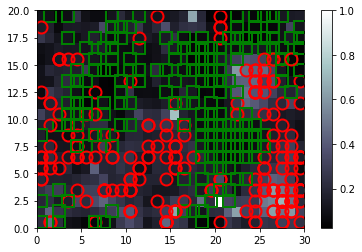

In [15]:
from pylab import plot, axis, show, pcolor, colorbar, bone
bone()
pcolor(som.distance_map().T) # distance map as background
colorbar()

#use different colors and markers for eact label

markers=['o','s','D']
colors=['r','g','b']

for cnt, xx in enumerate(data):
    w=som.winner(xx) #getting the winner
    #place a marker on the winning position for the sample xx
    plot(w[0]+.5,w[1]+.5,markers[target[cnt]], markerfacecolor='None',
         markeredgecolor=colors[target[cnt]], markersize=12,markeredgewidth=2)
axis([0,som._weights.shape[0],0,som._weights.shape[1]])
show() # show the figure